<a href="https://colab.research.google.com/github/rafnaves/Spotify-Data-Project/blob/main/C%C3%B3pia_de_KDD_Spotify_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KDD (Knowledge Discovery in Databases)



Este conjunto de dados compreende **faixas do Spotify** abrangendo uma ampla gama gêneros distintos. Cada faixa está acompanhada de seus próprios atributos de áudio. Os dados, apresentados em **formato CSV**, adotam uma estrutura tabular de fácil carregamento. **Atualizada em 2022**, essa base de dados conta com **21 colunas** e abrange **89 mil linhas** e pode ser encontrada [nesse link](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

In [ ]:
dados <- read.csv("/content/dataset.csv", header = TRUE)

In [ ]:
str(dados)

'data.frame':	114000 obs. of  21 variables:
 $ X               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ track_id        : chr  "5SuOikwiRyPMVoIQDJUgSV" "4qPNDBW1i3p13qLCt0Ki3A" "1iJBSr7s7jYXzM8EGcbK5b" "6lfxq3CG4xtTiEg7opyCyx" ...
 $ artists         : chr  "Gen Hoshino" "Ben Woodward" "Ingrid Michaelson;ZAYN" "Kina Grannis" ...
 $ album_name      : chr  "Comedy" "Ghost (Acoustic)" "To Begin Again" "Crazy Rich Asians (Original Motion Picture Soundtrack)" ...
 $ track_name      : chr  "Comedy" "Ghost - Acoustic" "To Begin Again" "Can't Help Falling In Love" ...
 $ popularity      : int  73 55 57 71 82 58 74 80 74 56 ...
 $ duration_ms     : int  230666 149610 210826 201933 198853 214240 229400 242946 189613 205594 ...
 $ explicit        : chr  "False" "False" "False" "False" ...
 $ danceability    : num  0.676 0.42 0.438 0.266 0.618 0.688 0.407 0.703 0.625 0.442 ...
 $ energy          : num  0.461 0.166 0.359 0.0596 0.443 0.481 0.147 0.444 0.414 0.632 ...
 $ key             : int  1 1 0 0 2 6 2

In [ ]:
#Instalando e requisitando os pacotes necessários para a análise
install.packages("GGally")
install.packages("MultivariateAnalysis")
install.packages("moments")
install.packages("factoextra")
install.packages("entropy")


library(ggplot2) #visualização
library(GGally) #outras visualizações
library(dplyr) #manuseio dos dados
library(MultivariateAnalysis) #dissimilaridade
library(moments) #assimetria dos dados
library(factoextra) #pca
library(entropy) #entropia


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘htmlwidgets’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘rgl’, ‘car’, ‘heplots’, ‘PCAmixdata’, ‘candisc’, ‘biotools’, ‘corrplot’, ‘ape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘lazyeval’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘mvtnorm’, ‘viridis’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘dendextend’, ‘FactoMineR’, ‘ggpub

### Tipos de atributos e suas operações


Variáveis **nominais:** `track_id`,`artists`,`album_name`,`track_name`,`track_genre`, `key`, `explicit` (binária), `mode` (binária).\
Variáveis **quantitativas:** `popularity`, `duration_ms`, `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`




#### Operações
- Atributo nominal: distinção (=, !=)\
– Atributo ordinal: distinção & ordem (<>)\
– Atributo de intervalo: distinção, ordem & diferenças
significativas(+-)\
– Atributo de proporção: todas as 4 propriedades/operações (*/)




In [ ]:
variaveis_nominais <- c("track_id", "artists", "album_name", "track_name", "track_genre","key", "explicit", "mode", "time_signature")

variaveis_numericas <- c("popularity", "duration_ms", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo")



### Medidas Resumo

 As variaveis que quantificam diferentes aspectos da música:`danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence` estão todas em mesma escala (de 0 à 1). Em contra partida, o restante dos atributos (`popularity`, `duration_ms`,`tempo`, `time_signature`) tem cada um sua própria escala.


Dentre as medidas resumo vale ressaltar a **duração** das faixas (`duration_ms`), tendo a menor duração sendo 0 ms e a maior sendo 5.237.295 ms. (aprox 87 min) e com média da duração de aproximadamente 228.029 ms (aprox 3,8 min).

Outro atributo que vale verificar é o `time_signature`, será que pode ser enquadrado como quantitativa?

In [ ]:
summary(dados[variaveis_numericas])

   popularity     duration_ms       danceability        energy       
 Min.   : 0.00   Min.   :  22266   Min.   :0.0000   Min.   :0.00144  
 1st Qu.:17.00   1st Qu.: 184684   1st Qu.:0.4170   1st Qu.:0.43000  
 Median :35.00   Median : 227826   Median :0.5430   Median :0.66900  
 Mean   :33.87   Mean   : 244811   Mean   :0.5276   Mean   :0.62328  
 3rd Qu.:51.00   3rd Qu.: 278433   3rd Qu.:0.6520   3rd Qu.:0.85900  
 Max.   :93.00   Max.   :4789026   Max.   :0.9750   Max.   :1.00000  
 NA's   :1       NA's   :1         NA's   :1        NA's   :1        
    loudness        speechiness       acousticness     instrumentalness  
 Min.   :-41.808   Min.   :0.00000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:-10.447   1st Qu.:0.03360   1st Qu.:0.01105   1st Qu.:0.000000  
 Median : -7.442   Median :0.04350   Median :0.18700   Median :0.000513  
 Mean   : -8.775   Mean   :0.06694   Mean   :0.32865   Mean   :0.210549  
 3rd Qu.: -5.390   3rd Qu.:0.06870   3rd Qu.:0.64050   3rd Qu.:0.32700

Assimetria Positiva:

popularity, duration_ms, speechiness, acousticness, instrumentalness,liveness
valence, tempo.

Assimetria Negativa:

danceability,energy,loudness

In [ ]:
#assimetria
data.frame(assimetria = skewness(dados[variaveis_numericas]))

,assimetria
,<dbl>
popularity,0.04640191
duration_ms,11.19503417
danceability,-0.39949138
energy,-0.59699356
loudness,-2.00651553
speechiness,4.64745487
acousticness,0.72728529
instrumentalness,1.73438337
liveness,2.10571041


In [ ]:
data.frame(qnd_unicos = sapply(dados[c(variaveis_nominais) ], n_distinct))

,qnd_unicos
,<int>
track_id,89741
artists,31438
album_name,46590
track_name,73609
track_genre,114
key,12
explicit,2
mode,2
time_signature,5


### Qualidade dos dados

Identificar problemas de qualidade de dados e possíveis problemas que poderiam acontecer, dentre esses problemas podemos citar :
- outliers
- valores errados
- valores ausentes
- dados duplicados

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


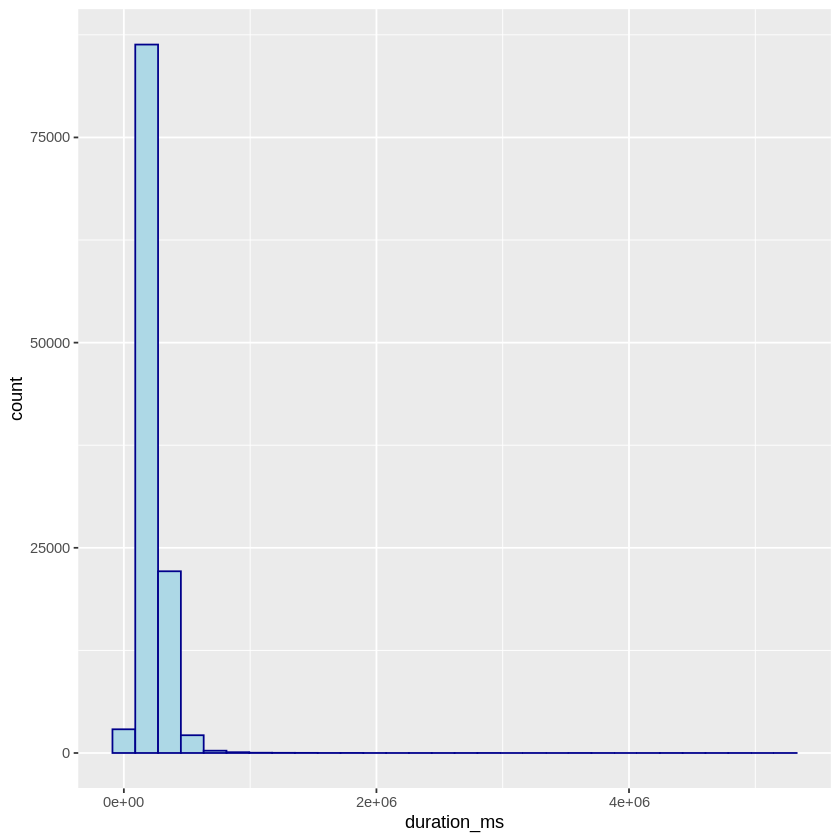

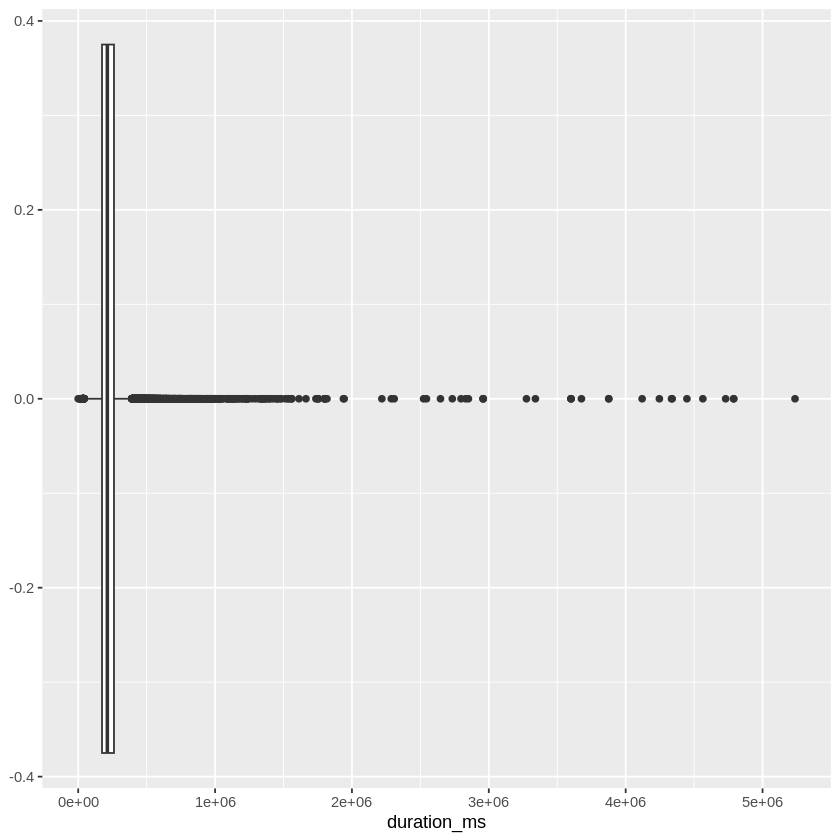

In [ ]:
# histograma da duration_ms: a maior sendo 5.237.295 ms (87 min), com média 3min.
ggplot(dados, aes(x=duration_ms))+
  geom_histogram(color="darkblue", fill="lightblue")

ggplot(dados, aes(x=duration_ms))+geom_boxplot()

Para identificar as músicas atípicas (ou outliers) na duração em milissegundos (duration_ms), pode-se utilizar métodos estatísticos para encontrar esses pontos que fogem significativamente do padrão. Vamos encontrar essas músicas que estão fora do padrão considerando um critério de serem mais longas que 87 minutos (ou 5.237.295 ms), que foi mencionado como o limite superior aproximado.

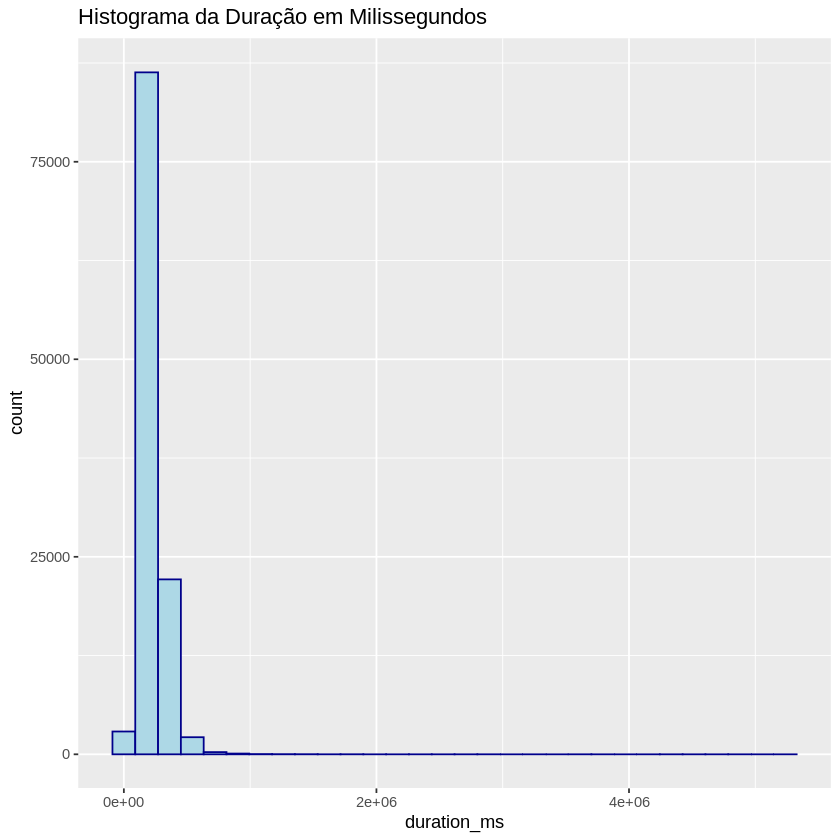

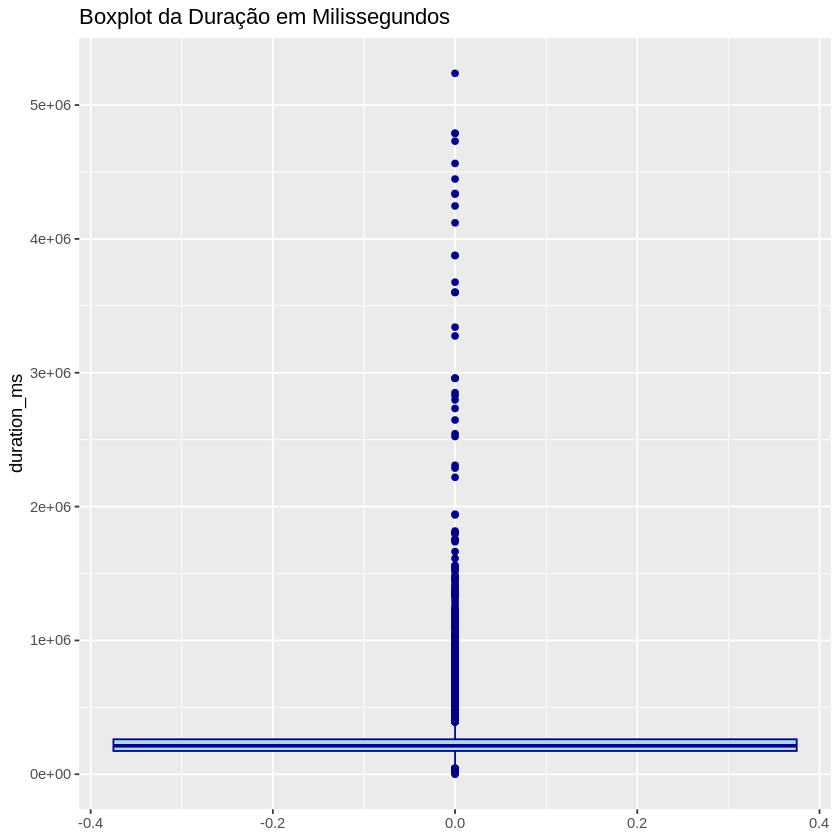

In [ ]:
# qual o nome das musicas atipicas?
library(ggplot2)

# Histograma da duração em milissegundos
ggplot(dados, aes(x = duration_ms)) +
  geom_histogram(color = "darkblue", fill = "lightblue", bins = 30) +
  labs(title = "Histograma da Duração em Milissegundos")

# Boxplot da duração em milissegundos
ggplot(dados, aes(y = duration_ms)) +
  geom_boxplot(color = "darkblue", fill = "lightblue") +
  labs(title = "Boxplot da Duração em Milissegundos")


Agora, para identificar as músicas atípicas (outliers), podemos usar uma medida como a Regra do IQR (Intervalo Interquartil) para identificar pontos fora do padrão. Por exemplo:

In [ ]:
# Calculando os limites do boxplot para identificar outliers
q1 <- quantile(dados$duration_ms, 0.25)
q3 <- quantile(dados$duration_ms, 0.75)
iqr <- q3 - q1
limite_superior <- q3 + 1.5 * iqr

# Identificando músicas atípicas
musicas_atipicas <- dados[dados$duration_ms > limite_superior, "track_name"]
# Exibir os nomes das músicas atípicas
print("Músicas atípicas:")
print(musicas_atipicas)


A saída de streaming foi truncada nas últimas 5000 linhas.
 [345] "A Fine Day to Die - Remastered"                                                                                                                                      
 [346] "In My Last Mourning... - 2012 Remaster"                                                                                                                              
 [347] "En Lenke Smidd I Blod"                                                                                                                                               
 [348] "Hunters Not Horned"                                                                                                                                                  
 [349] "Ewigkeit"                                                                                                                                                            
 [350] "Come the Flood"                                                

In [ ]:
#será se existe faixas duplicadas?
paste("qnt id únicos: ", n_distinct(dados[c("track_id")]) )
paste("qnt de faixas únicas", n_distinct(dados[c("track_name")]))

[1] "qnt id únicos:  89741"

[1] "qnt de faixas únicas 73609"

In [ ]:
# Identificar IDs de faixas com mais de um nome associado
ids_com_multiplos_nomes <- dados %>%
  group_by(track_id) %>%
  summarise(num_nomes_unicos = n_distinct(track_name)) %>%
  filter(num_nomes_unicos > 1) %>%
  pull(track_id)

# Exibir os IDs de faixas com mais de um nome associado
if (length(ids_com_multiplos_nomes) > 0) {
  print("IDs de faixas com mais de um nome associado:")
  print(ids_com_multiplos_nomes)
} else {
  print("Não há IDs de faixas com mais de um nome associado.")
}


[1] "Não há IDs de faixas com mais de um nome associado."


In [ ]:
#quantidade de valores nulos
data.frame(soma_NA = sapply(dados, function(x) sum(is.na(x))))

,soma_NA
,<int>
X,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0


### Dimensionalidade dos dados

Verificar a dimensionalidade e aplicar uma técnica de redução de dimensionalidade.

In [ ]:
dim(dados)

[1] 114000     21

#### PCA



 PCA vai apresenta a combinação linear das variáveis originais. Podemos analisar o valor absoluto de cada coeficiente que indica a contribuição relativa de cada atributo para o componente principal.


 Para a redução de dimencionalidade podemos escolher o PC1 e os primeiros k componentes que explicam a maior parte da variabilidade nos dados. No nosso caso, No PC1, a qual temos a máxima variabilidade possível dos dados, podemos retirar, por exemplo, a `duration_ms`, já que seu pesos é perto de perto de 0.


In [ ]:
dados.pca <- prcomp(dados[c(variaveis_numericas, "key", "mode","time_signature")], scale = TRUE)

In [ ]:
dados.pca

Standard deviations (1, .., p=14):
 [1] 1.7225479 1.2388128 1.1272964 1.0803413 1.0185582 0.9892127 0.9498658
 [8] 0.9407481 0.9124042 0.8839706 0.8541436 0.6696745 0.5703222 0.3739043

Rotation (n x k) = (14 x 14):
                         PC1         PC2         PC3          PC4         PC5
popularity       -0.03286063 -0.02594879 -0.09685511 -0.178433703  0.86752233
duration_ms       0.01041115  0.39603889 -0.21241413  0.049777809 -0.09239218
danceability     -0.25415446 -0.47446519 -0.23699676  0.183603893 -0.11666820
energy           -0.49481165  0.27206160  0.06837358 -0.003238420 -0.06104067
loudness         -0.50320436  0.08265934  0.01887245 -0.104208184  0.05972323
speechiness      -0.09455580 -0.06713676  0.52795832  0.359693060 -0.08184859
acousticness      0.42955462 -0.32000913  0.14866081  0.021883121  0.04970606
instrumentalness  0.27250683  0.31974399 -0.21752634  0.184713839 -0.27365376
liveness         -0.07448138  0.15336622  0.64647631  0.103278528  0.07958265
vale

### Padronização dos Dados
Nem todos os dados estão na mesma escala, é importante realizar a padronização das escalas com a finalidade de facilitar o aprendizado.



A padronização foi realizada atravez da **normalização** calculada utilizando a média e o desvio padrão de cada atributo.

$ x_{normalizado} = \frac{x - \mu}{\sigma} $


[Outras padronizações](https://rpubs.com/victorpasson/normalizacao) também podem ser testadas.


In [ ]:
dados_normalizados <- scale(dados[variaveis_numericas])

In [ ]:
summary(dados_normalizados)

   popularity        duration_ms       danceability          energy       
 Min.   :-1.49018   Min.   :-2.1252   Min.   :-3.26607   Min.   :-2.5499  
 1st Qu.:-0.72802   1st Qu.:-0.5029   1st Qu.:-0.63846   1st Qu.:-0.6734  
 Median : 0.07897   Median :-0.1409   Median : 0.07606   Median : 0.1734  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.75146   3rd Qu.: 0.3120   3rd Qu.: 0.73872   3rd Qu.: 0.8453  
 Max.   : 2.99311   Max.   :46.6857   Max.   : 2.40979   Max.   : 1.4257  
    loudness        speechiness         acousticness     instrumentalness 
 Min.   :-8.2063   Min.   :-0.800626   Min.   :-0.9470   Min.   :-0.5041  
 1st Qu.:-0.3488   1st Qu.:-0.461090   1st Qu.:-0.8962   1st Qu.:-0.5041  
 Median : 0.2495   Median :-0.338138   Median :-0.4388   Median :-0.5040  
 Mean   : 0.0000   Mean   : 0.000000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6474   3rd Qu.:-0.001439   3rd Qu.: 0.8513   3rd Qu.:-0.3458  
 Max.   : 2.5433   Max.  

In [ ]:
head(dados_normalizados)

popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1.7826194,0.02457505,0.6292415,-0.7171448,0.3008270,0.55184510,-0.85019778,-0.5041064,0.7587399,0.9293018,-1.14185778
0.9756283,-0.73085578,-0.8459043,-1.8899714,-1.7847363,-0.07899296,1.83172437,-0.5040917,-0.5912081,-0.7986862,-1.48971059
1.0652939,-0.16033103,-0.7421831,-1.1226645,-0.2932871,-0.27382450,-0.31549744,-0.5041097,-0.5071646,-1.3656822,-1.52830530
1.6929537,-0.24321258,-1.7332966,-2.3129842,-2.0392430,-0.45730664,1.77458541,-0.5038813,-0.4283739,-1.2769686,1.98785013
2.1861149,-0.27191775,0.2950288,-0.7887071,-0.2827489,-0.30314381,0.46339674,-0.5041097,-0.6862823,-1.1843978,-0.07334788
1.1101268,-0.12851302,0.6983889,-0.6376311,-0.1089686,0.19244711,-0.07791968,-0.5041097,-0.1289691,0.7403031,-0.80494625


### Matriz de dissimilaridade

trazer uma difinição e uma análise.

In [ ]:
dados_em_matriz <- matrix(dados_normalizados,nrow = nrow(dados), ncol = ncol(dados) )

Warning message in matrix(dados_normalizados, nrow = nrow(dados), ncol = ncol(dados)):
“data length [1254000] is not a sub-multiple or multiple of the number of columns [21]”


In [ ]:
dissimilarity(matrix(dados_normalizados), upper = TRUE,method = "euclidean")

In [ ]:
dist(dados_em_matriz, method="minkowski", p=3)

### Análise de Correlação



A matriz de correlação mostra o quão fortemente as variáveis estão relacionadas entre si. Da matriz abaixo vale destacar:

**Loudness e Energy: 0.76**

Existe uma correlação positiva significativa (0.76) entre a intensidade de uma música (loudness) e sua energia. Isso sugere que músicas mais altas podem ter uma tendência a serem mais energéticas.

**Energy e Acousticness: -0.73**

Há uma correlação negativa forte (-0.73) entre a energia de uma música e o grau de acústica. Isso indica que músicas mais energéticas tendem a ser menos acústicas.

**Loudness e Acousticness: -0.59**

A intensidade da música (loudness) e o grau de acústica têm uma correlação negativa moderada (-0.59), sugerindo que músicas mais altas tendem a ser menos acústicas.

**Danceability e Valence: 0.48**

Existe uma correlação positiva significativa (0.48) entre a capacidade de dança de uma música e a positividade de suas emoções (valence). Isso sugere que músicas mais dançantes têm uma tendência a serem mais positivas em termos de emoções

Warning message in ggcorr(dados, label = T):
“data in column(s) 'track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre' are not numeric and were ignored”


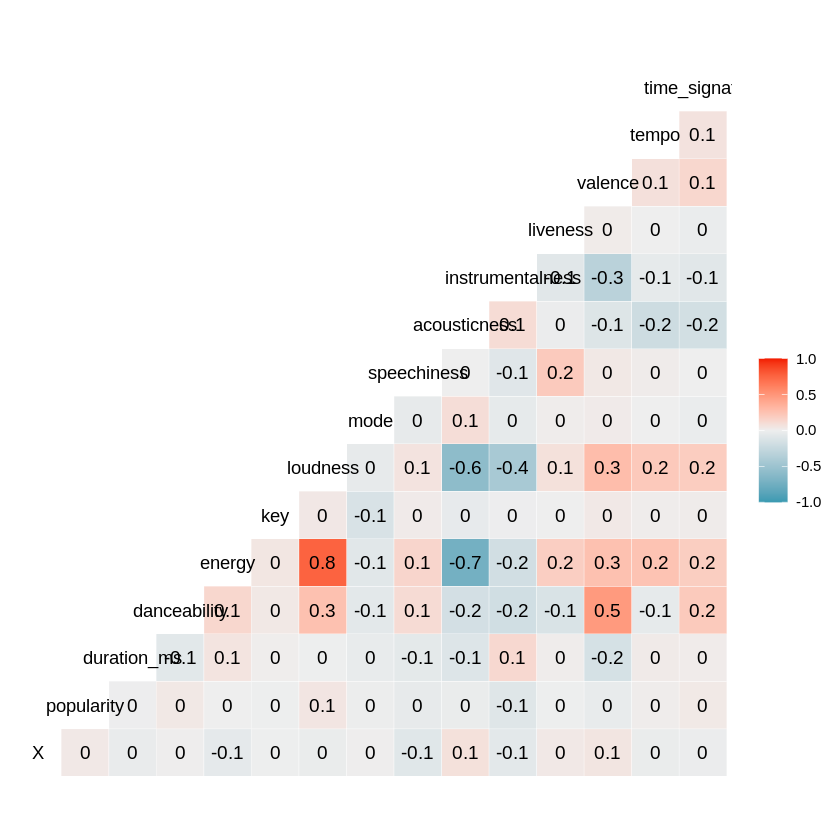

In [ ]:
ggcorr(dados, label=T)

Warning message in ggcorr(dados, label = T, method = c("pairwise", "spearman")):
“data in column(s) 'track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre' are not numeric and were ignored”


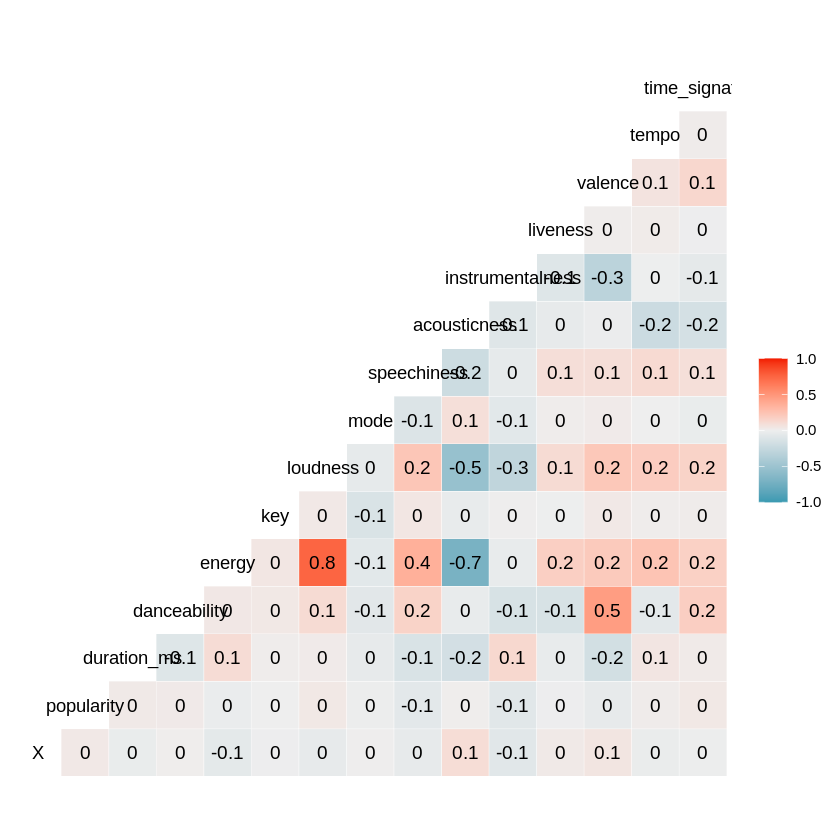

In [ ]:
ggcorr(dados, label=T, method = c("pairwise","spearman"))

In [ ]:
cor(dados[variaveis_numericas])

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000000,-0.007101209,0.03544813,0.001056136,0.050423036,-0.044926549,-0.025472413,-0.09513920,-0.0053871538,-0.04053429,0.0132046599
duration_ms,-0.007101209,1.000000000,-0.07342624,0.058522778,-0.003470165,-0.062599834,-0.103788130,0.12437050,0.0103213287,-0.15447861,0.0243456057
danceability,0.035448135,-0.073426240,1.00000000,0.134325483,0.259076733,0.108626090,-0.171533331,-0.18560625,-0.1316168567,0.47734124,-0.0504498714
energy,0.001056136,0.058522778,0.13432548,1.000000000,0.761689960,0.142508868,-0.733906321,-0.18187921,0.1847955223,0.25893400,0.2478505098
loudness,0.050423036,-0.003470165,0.25907673,0.761689960,1.000000000,0.060826328,-0.589802667,-0.43347686,0.0768986620,0.27984788,0.2124458966
speechiness,-0.044926549,-0.062599834,0.10862609,0.142508868,0.060826328,1.000000000,-0.002186336,-0.08961576,0.2052190573,0.03663458,0.0172732233
acousticness,-0.025472413,-0.103788130,-0.17153333,-0.733906321,-0.589802667,-0.002186336,1.000000000,0.10402712,-0.0207003608,-0.10707018,-0.2082241472
instrumentalness,-0.095139203,0.124370502,-0.18560625,-0.181879211,-0.433476862,-0.089615765,0.104027119,1.00000000,-0.0798925823,-0.32431233,-0.0503304013
liveness,-0.005387154,0.010321329,-0.13161686,0.184795522,0.076898662,0.205219057,-0.020700361,-0.07989258,1.0000000000,0.01908625,0.0005997673
valence,-0.040534295,-0.154478612,0.47734124,0.258933995,0.279847882,0.036634583,-0.107070180,-0.32431233,0.0190862548,1.00000000,0.0782730676


### Entropia dos dados
pesquisar como retirar a entropia dos dados.

In [ ]:
names(dados)

[1] "X"                "track_id"         "artists"          "album_name"      
 [5] "track_name"       "popularity"       "duration_ms"      "explicit"        
 [9] "danceability"     "energy"           "key"              "loudness"        
[13] "mode"             "speechiness"      "acousticness"     "instrumentalness"
[17] "liveness"         "valence"          "tempo"            "time_signature"  
[21] "track_genre"

### Visualização dos dados
Além das visualizações apresentadas anteriormente, foi escolhido outros gráficos que contribuisse para a familiridade com os dados.


In [ ]:
# Identificando músicas energicas
q3 <- quantile(dados$energy, 0.75)
musicas_energicas <-dados[dados$energy > q3, c("track_name", "track_genre","energy")]
head(musicas_energicas)

,track_name,track_genre,energy
,<chr>,<chr>,<dbl>
52,透明だった世界,acoustic,0.914
56,The Enemy,acoustic,0.890
77,Kaleidoscope,acoustic,0.913
99,Hold On,acoustic,0.937
132,Without You,acoustic,0.864
143,The Remedy (I Won't Worry),acoustic,0.867


In [ ]:
#

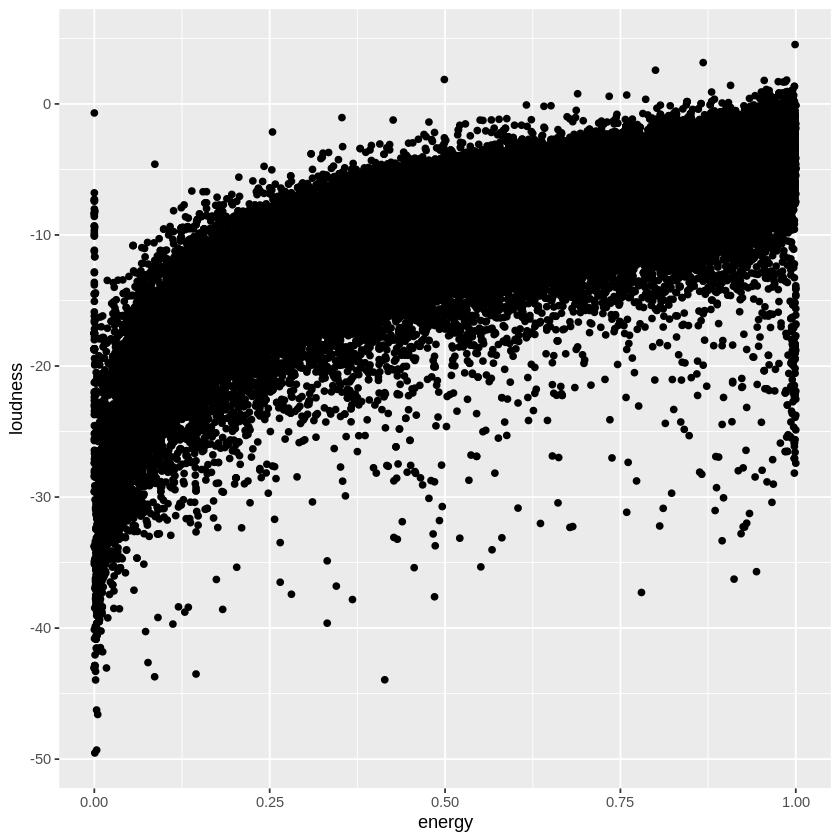

In [ ]:
#- Existe relação entre músicas energicas e musicas barulhentas?
ggplot(dados, aes(x=energy, y=loudness)) +
  geom_point()

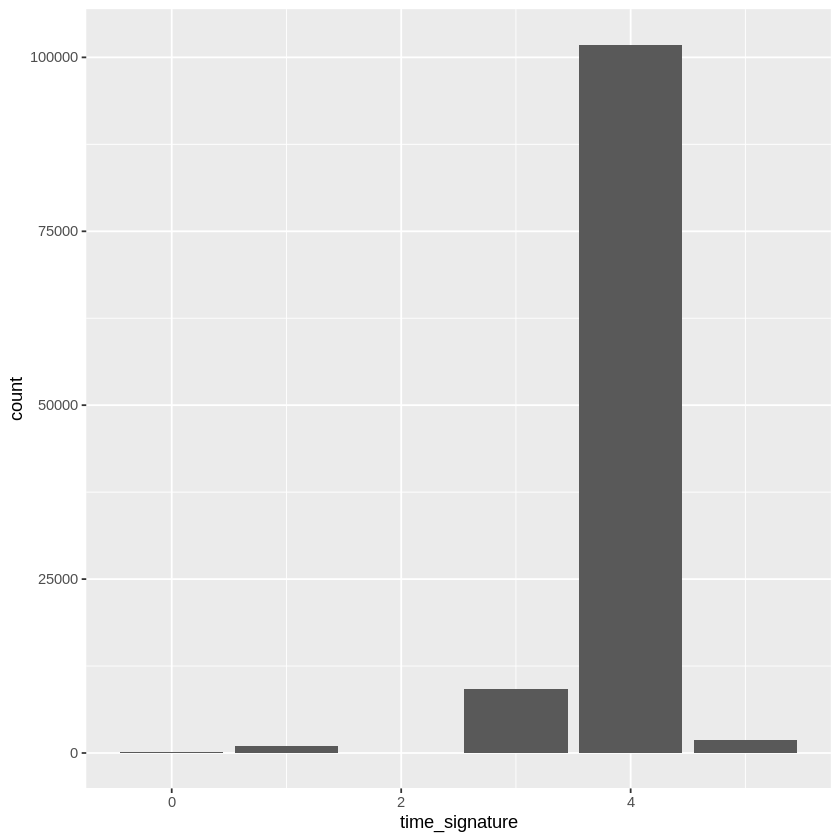

In [ ]:
#qual a assinatura mais predominante no conjunto de dados?
ggplot(dados, aes(x=time_signature))+
  geom_bar()

- Quais artistas são mais populares?
- Quais músicas são mais energéticas?
- Quais músicas são mais dançáveis?
- Quais artistas possuem mais músicas explicitas
- Quais músicas são mais longas e quais são menores?
- Quais álbuns estão mais populares?
- Quais artistas são mais dançáveis?
- Qual o gênero da música?
- A música possui muito instrumental?
- Qual a taxa de músicas mais melancólicas e alegres?
- Qual a média de vocal por gênero?
- Qual a média de instrumental por gênero?
- Existe associação entre músicas mais dançantes com músicas com presença de plateia?
- Quais músicas tem presença de plateia?
- Qual a associação entre músicas energéticas com a time_signature
- Existe relação entre músicas melancólicas e populares?
- Quais artistas têm produzido mais músicas com letras explícitas?
- Há diferenças nas assinaturas de tempo para diferentes gêneros musicais?
- Existe alguma relação entre a popularidade das músicas e o tom em que estão (key)?
- Quais artistas têm a maior variação de popularidade em suas músicas?
- Qual é a distribuição de músicas ao vivo versus gravações de estúdio no dataset?
- Como a acústica das músicas se relaciona com sua positividade (valence)?


In [ ]:
# Calculando a média de popularidade por artista
media_popularidade_por_artista <- dados %>%
  group_by(artists) %>%
  summarise(media_popularidade = mean(popularity, na.rm = TRUE)) %>%
  arrange(desc(media_popularidade))

# Exibindo os artistas mais populares
head(media_popularidade_por_artista, 10)  # Mostra os top 10 artistas mais populares


artists,media_popularidade
<chr>,<dbl>
Gorillaz;Tame Impala;Bootie Brown,82.00000
Öwnboss;Sevek,82.00000
Declan McKenna,80.00000
Papa Roach,80.00000
Foo Fighters,79.83333
System Of A Down,78.60000
Rage Against The Machine,78.33333
MGMT,78.28571
Buffalo Springfield,78.00000


In [ ]:
# Contando músicas explícitas por artista
musicas_explícitas_por_artista <- dados %>%
  filter(explicit == 1) %>%  # Filtra apenas músicas com letras explícitas
  group_by(artists) %>%
  summarise(total_musicas_explícitas = n()) %>%
  arrange(desc(total_musicas_explícitas))

# Exibindo os artistas que produziram mais músicas com letras explícitas (top 10, por exemplo)
head(musicas_explícitas_por_artista, 10)


artists,total_musicas_explícitas
<chr>,<int>
